## Import requirements

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the dataset

In [5]:
raw_data = pd.read_csv('./data/FuelConsumption.csv')
raw_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


We can see that this model consists of 13 colums:
Model year, Maker, Mode, Class, Engine Size, Cylinders, Transmission, Fuel Type, 
Fuel Consuption at City, Fuel Consuption at Highway, Fuel Consuption at Combined and Co2 emissions

### Getting the important parameters

In [6]:
valuable_data = raw_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
valuable_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


## Graphs

Let's plot some graphs to see the relation between X factor and the Co2 emissions

### Fuel Consumption

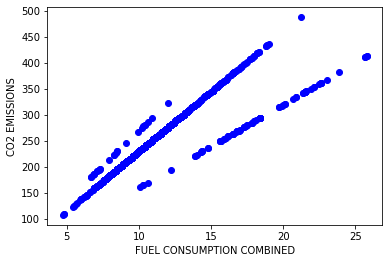

In [7]:
plt.scatter(valuable_data.FUELCONSUMPTION_COMB, valuable_data.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMPTION COMBINED')
plt.ylabel('CO2 EMISSIONS')
plt.show()

### Engine Size

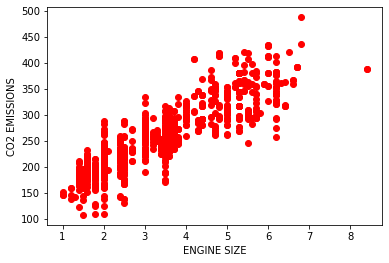

In [8]:
plt.scatter(valuable_data.ENGINESIZE, valuable_data.CO2EMISSIONS, color='red')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

### Cylinders

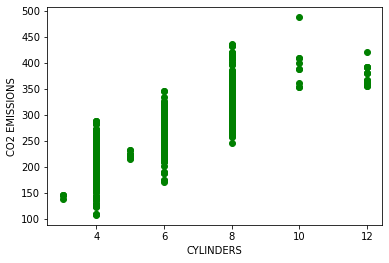

In [9]:
plt.scatter(valuable_data.CYLINDERS, valuable_data.CO2EMISSIONS, color='green')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSIONS')
plt.show()

## Train / Test datasets

In [10]:
mask = np.random.rand(len(raw_data)) < 0.8
train = valuable_data[mask]
test = valuable_data[~mask]

### Linear Models

In [11]:
from sklearn import linear_model as lm
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
lr = lm.LinearRegression()
trainedModels = lr.fit(train_x, train_y)
print('Coefficient: ', trainedModels.coef_)
print('Intercept: ', trainedModels.intercept_)

Coefficient:  [[39.76191904]]
Intercept:  [124.21320763]


#### Show output

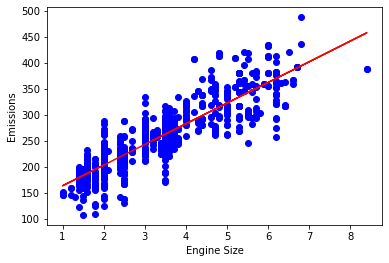

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, lr.coef_[0][0]*train_x + lr.intercept_[0], color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

## Evaluate the model

In [13]:
from sklearn.metrics import r2_score
train_x = np.asanyarray(test[['ENGINESIZE']])
train_y = np.asanyarray(test[['CO2EMISSIONS']])
train_y_eval = lr.predict(train_x)
print('Mean absolute error: {:.2f}'.format(np.mean(np.absolute(train_y_eval - train_y))))
print('Residual number of squares: {:.2f}'.format(np.mean(np.absolute(train_y_eval - train_y) ** 2)))
print('R2 Score: {:.2f}'.format(r2_score(train_y, train_y_eval)))

Mean absolute error: 22.34
Residual number of squares: 794.20
R2 Score: 0.74


## Multiple Variable models

Low let's check how multiple variables behave, instead of just the engine size

In [15]:
from sklearn import linear_model as lm
lr_multiple = lm.LinearRegression()

### Using FUELCONSUMPTION_COMB

In [16]:
multiple_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
multiple_y = np.asanyarray(train[['CO2EMISSIONS']])
lr_multiple.fit(multiple_x, multiple_y)
multiple_y_hat = lr_multiple.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
multiple_x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
multiple_y_test = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual Sum of squares: {:.2f}'.format(np.mean((multiple_y_hat - multiple_y_test) ** 2)))
print('Variance score: {:.2f}'.format(lr_multiple.score(multiple_x_test, multiple_y_test)))

Residual Sum of squares: 527.03
Variance score: 0.83


### Using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY

In [17]:
multiple_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
multiple_y = np.asanyarray(train[['CO2EMISSIONS']])
lr_multiple.fit(multiple_x, multiple_y)
multiple_y_hat = lr_multiple.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
multiple_x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
multiple_y_test = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual Sum of squares: {:.2f}'.format(np.mean((multiple_y_hat - multiple_y_test) ** 2)))
print('Variance score: {:.2f}'.format(lr_multiple.score(multiple_x_test, multiple_y_test)))

Residual Sum of squares: 526.05
Variance score: 0.83


## Conclusion

As we could see, it make almost not difference using FUELCONSUMPTION_COMB only and FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY